In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [55]:
df = pd.read_csv("../data/processed/processed_v1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18605 entries, 0 to 18604
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PUMFID    18605 non-null  int64
 1   PGM_100   18605 non-null  int64
 2   PGM_290   18605 non-null  int64
 3   PGM_350   18605 non-null  int64
 4   PGM_380   18605 non-null  int64
 5   PGM_P400  18605 non-null  int64
 6   PGM_P405  18605 non-null  int64
 7   EDU_010   18605 non-null  int64
 8   EDU_020   18605 non-null  int64
 9   REG_INST  18605 non-null  int64
 10  CERTLEVP  18605 non-null  int64
 11  PGMCIPAP  18605 non-null  int64
 12  COOP      18605 non-null  int64
 13  HLOSGRDP  18605 non-null  int64
 14  SCHOLAR   18605 non-null  int64
 15  DBTALGRD  18605 non-null  int64
 16  PERSINCP  18605 non-null  int64
 17  FATEDGRD  18605 non-null  int64
 18  MOTEDGRD  18605 non-null  int64
dtypes: int64(19)
memory usage: 2.7 MB


In [56]:
filter_df = df.drop(['PUMFID'],axis=1)
filter_df.head()

,PGM_100,PGM_290,PGM_350,PGM_380,PGM_P400,PGM_P405,EDU_010,EDU_020,REG_INST,CERTLEVP,PGMCIPAP,COOP,HLOSGRDP,SCHOLAR,DBTALGRD,PERSINCP,FATEDGRD,MOTEDGRD
0,2,1,2,2,1,1,1,2,1,2,5,2,2,1,2,5,3,3
1,2,1,2,2,1,2,1,1,4,1,5,2,1,1,2,5,1,1
2,2,2,1,2,2,3,2,6,4,2,4,2,2,6,9,1,3,3
3,2,2,2,2,1,2,1,1,2,3,4,2,3,6,2,3,1,1
4,1,2,2,2,1,1,2,6,4,1,8,2,1,6,6,7,2,2


In [57]:
y = pd.DataFrame(filter_df['PERSINCP'])
x = filter_df.drop(['PERSINCP'],axis=1)

In [58]:
y_reduced = y.copy()

y_reduced.replace({1:0, 2: 0, 3: 0, 4: 0}, inplace=True)

y_reduced.replace({5: 0, 6: 0}, inplace=True)

y_reduced.replace({7: 1, 8:1, 9:1, 10:1}, inplace=True)
y_reduced.value_counts().T

PERSINCP
0           12859
1            5746
Name: count, dtype: int64

In [59]:
x = sm.add_constant(x)
x

,const,PGM_100,PGM_290,PGM_350,PGM_380,PGM_P400,PGM_P405,EDU_010,EDU_020,REG_INST,CERTLEVP,PGMCIPAP,COOP,HLOSGRDP,SCHOLAR,DBTALGRD,FATEDGRD,MOTEDGRD
0,1.0,2,1,2,2,1,1,1,2,1,2,5,2,2,1,2,3,3
1,1.0,2,1,2,2,1,2,1,1,4,1,5,2,1,1,2,1,1
2,1.0,2,2,1,2,2,3,2,6,4,2,4,2,2,6,9,3,3
3,1.0,2,2,2,2,1,2,1,1,2,3,4,2,3,6,2,1,1
4,1.0,1,2,2,2,1,1,2,6,4,1,8,2,1,6,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18600,1.0,2,1,2,2,3,2,2,6,4,1,1,2,3,6,6,1,1
18601,1.0,2,1,1,2,1,1,2,6,4,3,6,2,3,4,6,1,1
18602,1.0,1,1,2,2,1,4,2,6,1,1,9,2,1,6,2,1,1
18603,1.0,1,1,2,1,2,2,2,6,3,2,5,1,2,1,1,1,2


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y_reduced, test_size=0.20)

In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14884 entries, 16854 to 9457
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   const     14884 non-null  float64
 1   PGM_100   14884 non-null  int64  
 2   PGM_290   14884 non-null  int64  
 3   PGM_350   14884 non-null  int64  
 4   PGM_380   14884 non-null  int64  
 5   PGM_P400  14884 non-null  int64  
 6   PGM_P405  14884 non-null  int64  
 7   EDU_010   14884 non-null  int64  
 8   EDU_020   14884 non-null  int64  
 9   REG_INST  14884 non-null  int64  
 10  CERTLEVP  14884 non-null  int64  
 11  PGMCIPAP  14884 non-null  int64  
 12  COOP      14884 non-null  int64  
 13  HLOSGRDP  14884 non-null  int64  
 14  SCHOLAR   14884 non-null  int64  
 15  DBTALGRD  14884 non-null  int64  
 16  FATEDGRD  14884 non-null  int64  
 17  MOTEDGRD  14884 non-null  int64  
dtypes: float64(1), int64(17)
memory usage: 2.2 MB


In [62]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3721 entries, 7406 to 16767
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   const     3721 non-null   float64
 1   PGM_100   3721 non-null   int64  
 2   PGM_290   3721 non-null   int64  
 3   PGM_350   3721 non-null   int64  
 4   PGM_380   3721 non-null   int64  
 5   PGM_P400  3721 non-null   int64  
 6   PGM_P405  3721 non-null   int64  
 7   EDU_010   3721 non-null   int64  
 8   EDU_020   3721 non-null   int64  
 9   REG_INST  3721 non-null   int64  
 10  CERTLEVP  3721 non-null   int64  
 11  PGMCIPAP  3721 non-null   int64  
 12  COOP      3721 non-null   int64  
 13  HLOSGRDP  3721 non-null   int64  
 14  SCHOLAR   3721 non-null   int64  
 15  DBTALGRD  3721 non-null   int64  
 16  FATEDGRD  3721 non-null   int64  
 17  MOTEDGRD  3721 non-null   int64  
dtypes: float64(1), int64(17)
memory usage: 552.3 KB


In [10]:
model = sm.Logit(y_train, x_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.541538
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               PERSINCP   No. Observations:                14884
Model:                          Logit   Df Residuals:                    14866
Method:                           MLE   Df Model:                           17
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                  0.1263
Time:                        16:27:32   Log-Likelihood:                -8060.3
converged:                       True   LL-Null:                       -9225.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0017      0.208    -14.419      0.000      -3.410      -2.594
PGM_100       -0.1539      0.042     -3.684      0.000      -0.236      -0.072
PGM_290       -0.3580      0.045     -7.990      0.000      -0.446      -0.270
PGM_350        0.0253      0.031      0.810      0.418      -0.036       0.087
PGM_380        0.0888      0.056      1.598      0.110      -0.020       0.198
PGM_P400       0.3299      0.028     11.674      0.000       0.275       0.385
PGM_P405      -0.1547      0.022     -6.970      0.000      -0.198      -0.111
EDU_010       -0.1536      0.087     -1.764      0.078      -0.324       0.017
EDU_020        0.2248      0.020     10.969      0.000       0.185       0.265
REG_INST       0.1278      0.019      6.906      0.000       0.092       0.164
CERTLEVP       0.4112      0.032     13.012      0.000       0.349       0.473
PGMCIPAP       0.0603      0.007      8.802      0.000       0.047       0.074
COOP          -0.0859      0.058     -1.493      0.136      -0.199       0.027
HLOSGRDP       0.3090      0.033      9.237      0.000       0.243       0.375
SCHOLAR       -0.0226      0.009     -2.462      0.014      -0.041      -0.005
DBTALGRD       0.0144      0.009      1.629      0.103      -0.003       0.032
FATEDGRD      -0.0726      0.013     -5.744      0.000      -0.097      -0.048
MOTEDGRD      -0.1105      0.015     -7.221      0.000      -0.140      -0.080
==============================================================================
"""

In [11]:
summary_df = pd.DataFrame(result.summary().tables[1].data[1:], columns=result.summary().tables[1].data[0])
summary_df['coef'] = pd.to_numeric(summary_df['coef'])
summary_df['P>|z|'] = pd.to_numeric(summary_df['P>|z|'])

# Filter variables with p-value less than 0.05
significant_variables = summary_df[summary_df['P>|z|'] < 0.05]
print("Variables with p-value less than 0.05:")
print(significant_variables)

Variables with p-value less than 0.05:
                coef    std err          z  P>|z|     [0.025     0.975]
0      const -3.0017      0.208    -14.419  0.000     -3.410     -2.594
1    PGM_100 -0.1539      0.042     -3.684  0.000     -0.236     -0.072
2    PGM_290 -0.3580      0.045     -7.990  0.000     -0.446     -0.270
5   PGM_P400  0.3299      0.028     11.674  0.000      0.275      0.385
6   PGM_P405 -0.1547      0.022     -6.970  0.000     -0.198     -0.111
8    EDU_020  0.2248      0.020     10.969  0.000      0.185      0.265
9   REG_INST  0.1278      0.019      6.906  0.000      0.092      0.164
10  CERTLEVP  0.4112      0.032     13.012  0.000      0.349      0.473
11  PGMCIPAP  0.0603      0.007      8.802  0.000      0.047      0.074
13  HLOSGRDP  0.3090      0.033      9.237  0.000      0.243      0.375
14   SCHOLAR -0.0226      0.009     -2.462  0.014     -0.041     -0.005
16  FATEDGRD -0.0726      0.013     -5.744  0.000     -0.097     -0.048
17  MOTEDGRD -0.1105     

In [65]:
summary_df.to_csv('../data/results/results.csv')

In [12]:
significant_variables.to_csv("../data/results/results.csv")

In [13]:
prediction = result.predict(x_test)
y_pred = (prediction > 0.5).astype(int)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(classification_rep)

0.7301800591238914
[[2348  255]
 [ 749  369]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      2603
           1       0.59      0.33      0.42      1118

    accuracy                           0.73      3721
   macro avg       0.67      0.62      0.62      3721
weighted avg       0.71      0.73      0.70      3721



In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y_reduced, test_size=0.20)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
results = model.fit(x_train, y_train)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7183552808384843
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.81      2564
           1       0.59      0.32      0.42      1157

    accuracy                           0.72      3721
   macro avg       0.67      0.61      0.62      3721
weighted avg       0.70      0.72      0.69      3721



In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y_reduced, cv=5, scoring='accuracy',)

# Print the average accuracy across all folds
print("Average Accuracy: {:.2f}".format(scores.mean()))


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

Average Accuracy: 0.73


array([0.73313625, 0.73447998, 0.72964257, 0.73071755, 0.73098629])

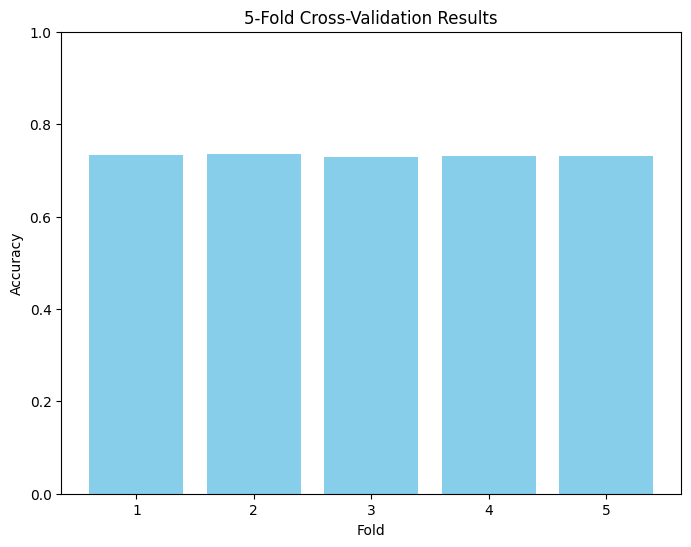

In [25]:
# Plot the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Results')
plt.ylim(0, 1)
plt.show()

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

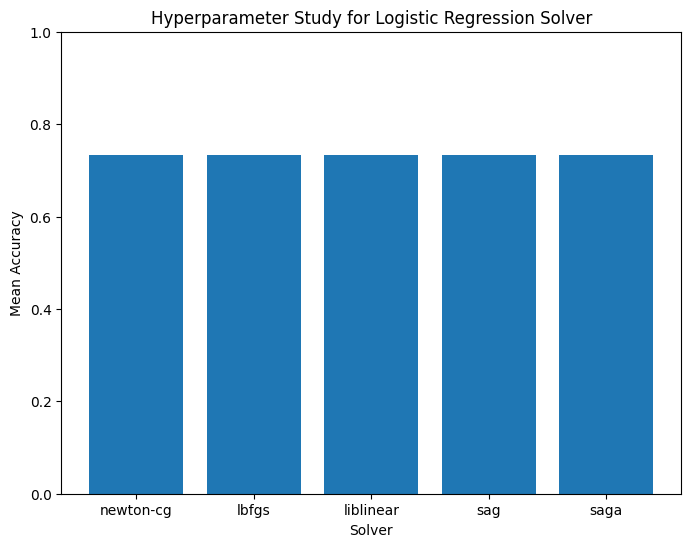

In [53]:
from sklearn.model_selection import StratifiedKFold

# range of values for the 'solver' parameter
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

mean_scores = []

# Perform cross-validation for each solver
for solver in solvers:
    logreg = LogisticRegression(solver=solver, max_iter=1000)
    scores = cross_val_score(logreg, x, y_reduced, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
    mean_scores.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(solvers, mean_scores)
plt.xlabel('Solver')
plt.ylim(0, 1)
plt.ylabel('Mean Accuracy')
plt.title('Hyperparameter Study for Logistic Regression Solver')
plt.show()


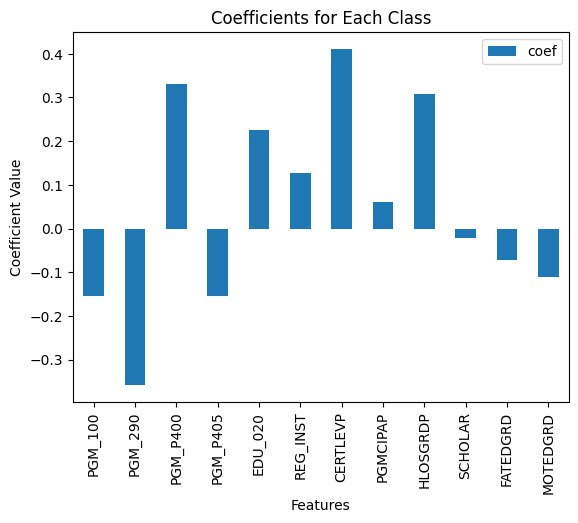

In [51]:
coefficients = significant_variables.iloc[1:,:2]
coefficients.rename(columns={'': 'features'}, inplace=True)

# Plotting
coefficients.plot(kind='bar',x='features', y='coef')
plt.title('Coefficients for Each Class')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()